In [1]:
import numpy as np
import cv2
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from   keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os
from   keras.models import Sequential
from   keras.layers import Dense, Conv2D, MaxPool2D, Flatten, AveragePooling2D

In [2]:
test_data = 'test'
train_data = 'train'

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen  = ImageDataGenerator(rescale = 1./255)

In [4]:
IMG_H = 32
IMG_W = 32

train_set = train_datagen.flow_from_directory(train_data,
                    target_size = (IMG_H,IMG_W),
                    batch_size = 32,
                    color_mode = 'grayscale',
                    shuffle = True,
                    class_mode = 'categorical')

Found 14407 images belonging to 10 classes.


In [5]:
test_set = test_datagen.flow_from_directory(test_data,
                        target_size = (IMG_H, IMG_W),
                        color_mode = 'grayscale',
                        batch_size = 32,
                        shuffle = True,
                        class_mode = 'categorical')

Found 3602 images belonging to 10 classes.


In [6]:
model = keras.Sequential()

model.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(32,32,1)))
model.add(AveragePooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=10, activation = 'softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [8]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'])

In [9]:
hist = model.fit(train_set, steps_per_epoch=200, epochs=5, validation_data=test_set, validation_steps=100)

Epoch 1/5
200/200 [==============================] - 17s 83ms/step - loss: 0.7347 - accuracy: 0.7622 - val_loss: 0.3017 - val_accuracy: 0.9159
Epoch 2/5
200/200 [==============================] - 12s 62ms/step - loss: 0.2217 - accuracy: 0.9317 - val_loss: 0.1842 - val_accuracy: 0.9425
Epoch 3/5
200/200 [==============================] - 11s 56ms/step - loss: 0.1378 - accuracy: 0.9580 - val_loss: 0.1345 - val_accuracy: 0.9606
Epoch 4/5
200/200 [==============================] - 11s 54ms/step - loss: 0.1090 - accuracy: 0.9678 - val_loss: 0.0972 - val_accuracy: 0.9703
Epoch 5/5
200/200 [==============================] - 11s 53ms/step - loss: 0.0903 - accuracy: 0.9731 - val_loss: 0.0854 - val_accuracy: 0.9734


In [10]:
img = keras.preprocessing.image.load_img("70405.jpg", color_mode="grayscale", target_size = (32,32,1))  ##image for 7

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)                   # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]

In [11]:
print(score)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [12]:
img = keras.preprocessing.image.load_img("30213.jpg",color_mode = 'grayscale', target_size=(32,32,1))  ##image for 3

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)                   # Create batch axis

predictions = model.predict(img_array)
score1 = predictions[0]

In [13]:
print(score1)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [14]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


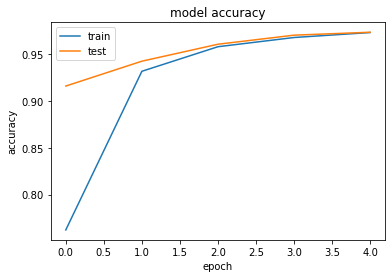

In [15]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

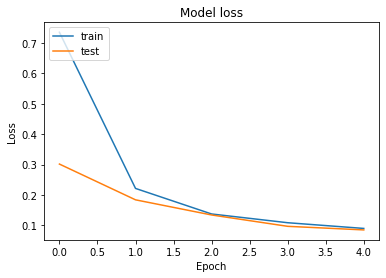

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()